In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import cv2

In [2]:
fx1 = np.array([[-1,1],[-1,1]])
fy1 = np.array([[-1,-1],[1,1]])
ft1 = np.array([[-1,-1],[-1,-1]])
ft2 = np.array([[1,1],[1,1]])
lap_mask = np.array([[1/12,1/6,1/12],[1/6,0,1/6],[1/12,1/6,1/12]])

In [3]:
def Horn_Schunck(frame1, frame2, Lambda=4, itr = 1000):
    
    fx = 0.5 * (signal.convolve2d(frame1, fx1, mode='same') + signal.convolve2d(frame2, fx1, mode='same'))
    fy = 0.5 * (signal.convolve2d(frame1, fy1, mode='same') + signal.convolve2d(frame2, fy1, mode='same'))
    ft = signal.convolve2d(frame1, ft1, mode='same') + signal.convolve2d(frame2, ft2, mode='same')
    
    u = np.zeros(frame1.shape)
    v = np.zeros(frame1.shape)
    for i in range(itr):
        uavg = signal.convolve2d(u, lap_mask, mode='same')
        vavg = signal.convolve2d(v, lap_mask, mode='same')
        P = fx * uavg + fy * vavg + ft
        D = fx**2 + fy**2 + Lambda
        u = uavg - fx * (P/D)
        v = vavg - fy * (P/D)
        
    return (u,v)

def motion_vec(img, flow, step):
    
    h, w = img.shape
    y, x = np.mgrid[step:h:step,step:w:step].reshape(2, -1)
    fx, fy = flow[y,x].T
 
    # create line endpoints
    lines = np.vstack([x, y, x+fx, y+fy]).T.reshape(-1, 2, 2)
    lines = np.int32(lines)
 
    # create imgage and draw
    motion = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for (x1,y1), (x2,y2) in lines:
        cv2.line(motion, (x1,y1),(x2,y2), (255,0,0), 1)
        cv2.circle(motion, (x1,y1), 1, (0,0,255), -1)
        
    return motion

In [4]:
cam = cv2.VideoCapture("E:/Horn Schunck/Butterflies.mp4")

currentframe = 0
numberofframe = 7
while(currentframe < numberofframe):
    ret,frame = cam.read()

    if ret:
        name = 'E:/Horn Schunck/frame' + str(currentframe+1) + '.jpg'
        print ('Creating:  ' + name)
        cv2.imwrite(name, frame)
        currentframe += 1

Creating:  E:/Horn Schunck/frame1.jpg
Creating:  E:/Horn Schunck/frame2.jpg
Creating:  E:/Horn Schunck/frame3.jpg
Creating:  E:/Horn Schunck/frame4.jpg
Creating:  E:/Horn Schunck/frame5.jpg
Creating:  E:/Horn Schunck/frame6.jpg
Creating:  E:/Horn Schunck/frame7.jpg


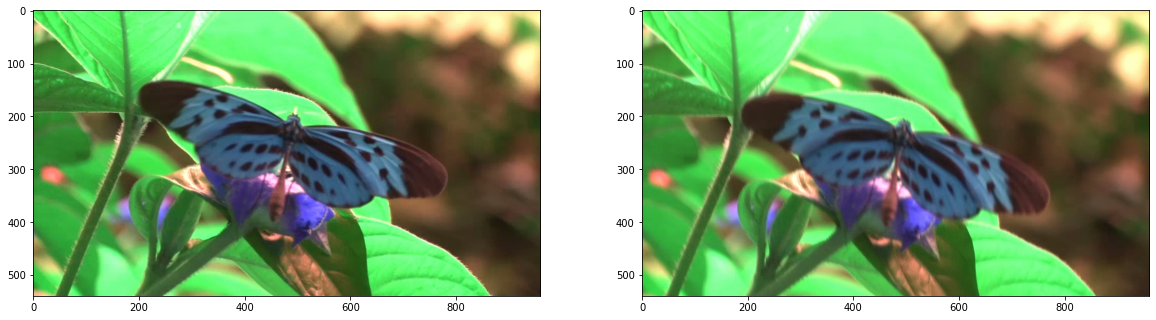

In [5]:
frame1=cv2.imread("E:/Horn Schunck/frame1.jpg")
frame2=cv2.imread("E:/Horn Schunck/frame7.jpg")

f=plt.figure(figsize=(20,20))
f.add_subplot(3,2,1)
plt.imshow(frame1)
f.add_subplot(3,2,2)
plt.imshow(frame2)

frame1=cv2.cvtColor(frame1, cv2.COLOR_RGB2GRAY)
frame2=cv2.cvtColor(frame2, cv2.COLOR_RGB2GRAY)

In [6]:
uv = Horn_Schunck(frame1, frame2)

In [7]:
mergeruv = np.concatenate(uv, axis=1).reshape((frame1.shape[0], frame1.shape[1], 2))

vec = motion_vec(frame1, mergeruv, 8)

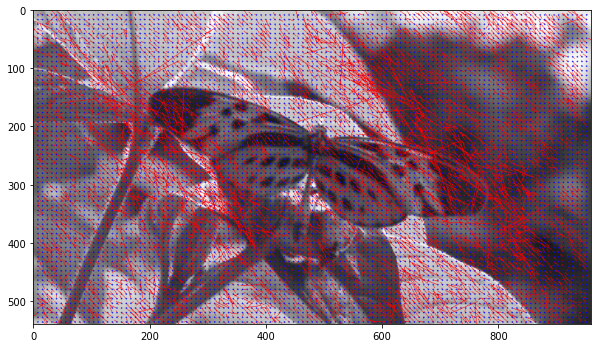

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(vec)

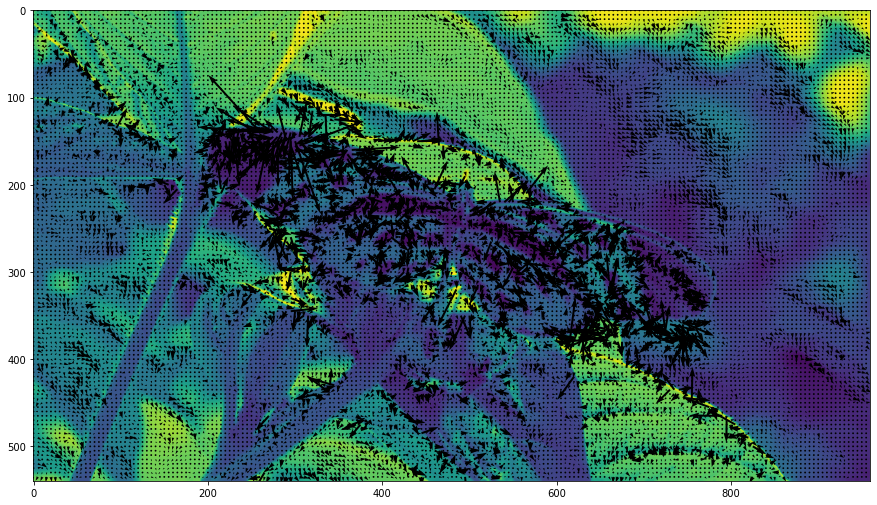

In [9]:
n, m = uv[0].shape
u_deci = uv[0][np.ix_(range(0, n, 5), range(0, m, 5))]
v_deci = uv[1][np.ix_(range(0, n, 5), range(0, m, 5))]
[X,Y] = np.meshgrid(np.arange(m, dtype='float64'), np.arange(n, dtype='float64'))
X_deci = X[np.ix_(range(0, n, 5), range(0, m, 5))]
Y_deci = Y[np.ix_(range(0, n, 5), range(0, m, 5))]
u_deci = uv[0][np.ix_(range(0, n, 5), range(0, m, 5))]
v_deci = uv[1][np.ix_(range(0, n, 5), range(0, m, 5))]
plt.figure(figsize=(15,15))
plt.imshow(frame1)
plt.quiver(X_deci, Y_deci, u_deci, v_deci)